# Supervise Learinin 

In [55]:
import numpy as np
import pandas as pd

## Regression Problem

In [56]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50,n_features=5)

In [57]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,1.022289,-1.347624,-0.229602,0.829143,-2.068420
1,0.146369,0.681523,-0.329954,-0.108117,-0.175821
2,0.125151,-0.538285,0.569622,0.625452,0.109429
3,1.248064,-0.862418,-1.087757,0.981979,-0.638220
4,0.495290,0.131338,0.793375,-1.180818,-0.207870


In [58]:
y[:5]

array([-173.39364788,   -6.40511493,   66.12054581,  -68.53841824,
         12.06138528])

In [59]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [60]:
fs = SelectKBest(score_func=mutual_info_regression,k=3)
fs.fit(x,y)

SelectKBest(k=3, score_func=<function mutual_info_regression at 0x7ff27a6d43a0>)

In [61]:
fs.scores_

array([0.12243296, 0.13965172, 0.20390156, 0.09769962, 0.14231297])

In [62]:
mi_score = pd.Series(fs.scores_,index=x.columns)
mi_score

0    0.122433
1    0.139652
2    0.203902
3    0.097700
4    0.142313
dtype: float64

<AxesSubplot:>

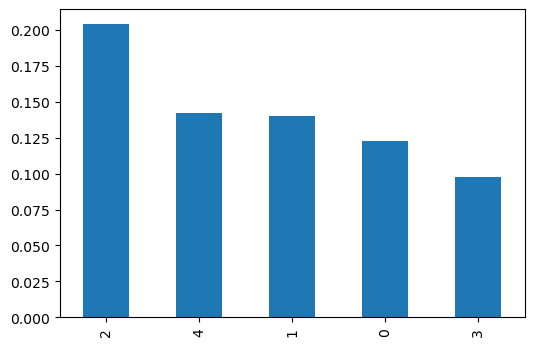

In [63]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [64]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [65]:
x_selected.head()

,0,1,2
0,-1.347624,-0.229602,-2.068420
1,0.681523,-0.329954,-0.175821
2,-0.538285,0.569622,0.109429
3,-0.862418,-1.087757,-0.638220
4,0.131338,0.793375,-0.207870


In [66]:
x.head()

,0,1,2,3,4
0,1.022289,-1.347624,-0.229602,0.829143,-2.068420
1,0.146369,0.681523,-0.329954,-0.108117,-0.175821
2,0.125151,-0.538285,0.569622,0.625452,0.109429
3,1.248064,-0.862418,-1.087757,0.981979,-0.638220
4,0.495290,0.131338,0.793375,-1.180818,-0.207870


## Clasification problem

In [67]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [68]:
x ,y= make_classification(n_samples=50,n_features = 5,n_informative=2)
x = pd.DataFrame(x)

In [69]:
x.head()

,0,1,2,3,4
0,1.269470,-2.662396,-1.764434,-2.313798,-1.619380
1,-0.294406,-0.198420,0.364497,1.061332,0.867779
2,-0.235800,1.749672,0.288355,0.892124,0.734495
3,-0.049839,1.137943,0.029652,0.555959,0.499881
4,1.106089,-0.538843,-1.591621,-1.378902,-0.813327


In [70]:
y[:5]

array([0, 1, 1, 1, 0])

<AxesSubplot:>

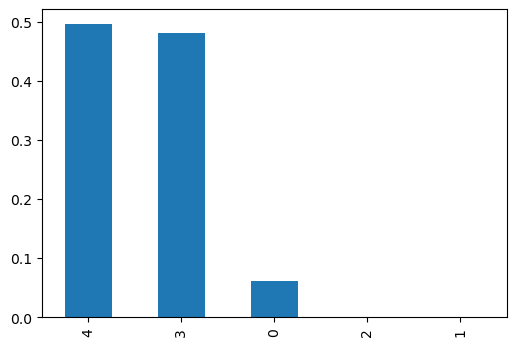

In [71]:
fs = SelectKBest(score_func=mutual_info_classif,k=3)
fs.fit(x,y)
mi_score = pd.Series(fs.scores_,index=x.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize= (6,4))

In [72]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [73]:
x_selected.head()

,0,1,2
0,1.269470,-2.313798,-1.619380
1,-0.294406,1.061332,0.867779
2,-0.235800,0.892124,0.734495
3,-0.049839,0.555959,0.499881
4,1.106089,-1.378902,-0.813327
